In [1]:
import mediapy as media
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
from PIL import Image

from trlc_sdk.http.client import HTTPClient

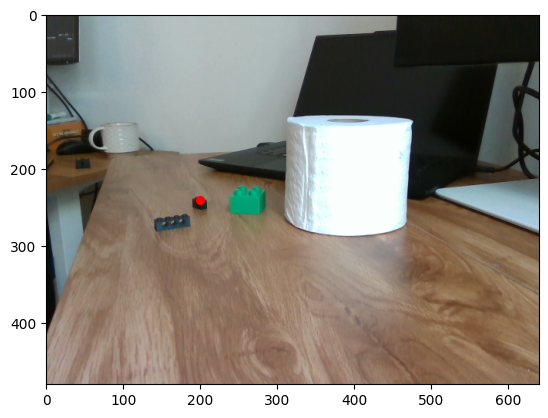

In [2]:
image_path = './../capture/out/rgb.png'

point_coords = [ [200, 240] ] # [x, y]
point_labels = [ 1 ] # 1=add, 0=remove

plt.imshow(media.read_image(image_path))
plt.scatter([point_coords[0][0]], [point_coords[0][1]], c='red', s=30, marker='o')
plt.show()

In [3]:
if point_coords[0][0] is None:
    raise ValueError("Please set point_coords to the coordinates of the point you want to add/remove")

In [4]:
data = {
    'prompt': json.dumps({
        'point_coords': point_coords,
        'point_labels': [1]
    })
}

files = {
    'image': open(image_path, 'rb')
}

client = HTTPClient()
mask = client.run_segmentation(files, data)

,

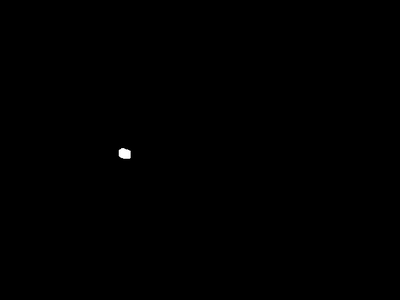
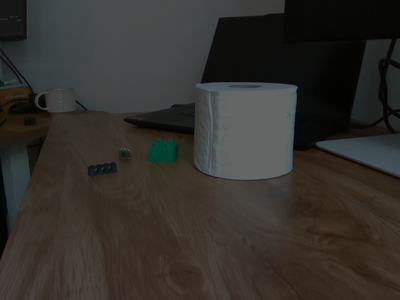

In [5]:
masked_image = media.read_image(image_path).copy()
masked_image = masked_image.astype(float)
masked_image[mask == 0] = masked_image[mask == 0] * 0.4  
masked_image = masked_image.astype(np.uint8)

media.show_images([mask, masked_image], height=300)

In [6]:
binary_mask = (mask > 0).astype(np.uint8) * 255
Image.fromarray(binary_mask).save('mask.png')

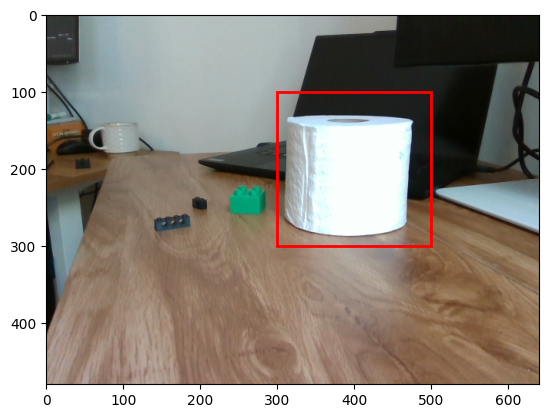

In [7]:
# box in xyxy format: [x1, y1, x2, y2]
box = [300, 100, 500, 300]  # [x1, y1, x2, y2]

fig, ax = plt.subplots()
ax.imshow(media.read_image(image_path))
rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                     linewidth=2, edgecolor='red', facecolor='none')
ax.add_patch(rect)
plt.show()

In [8]:
data = {
    'prompt': json.dumps({
        'box': box,
    })
}

files = {
    'image': open(image_path, 'rb')
}

client = HTTPClient()
mask = client.run_segmentation(files, data)

,

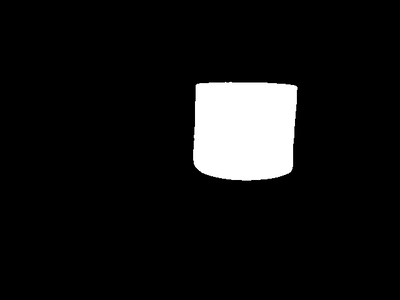
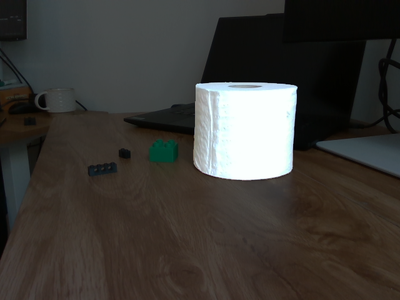

In [9]:
masked_image = media.read_image(image_path).copy()
masked_image = masked_image.astype(float)
masked_image[mask == 0] = masked_image[mask == 0] * 0.4  
masked_image = masked_image.astype(np.uint8)

media.show_images([mask, masked_image], height=300)

In [10]:
# binary_mask = (mask > 0).astype(np.uint8) * 255
# Image.fromarray(binary_mask).save('mask.png')